In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import missingno as msno

In [2]:
df = pd.read_csv('matches.csv', index_col='date', parse_dates=['date'])
print(df.shape)
df.head()

(756, 17)


,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
date,,,,,,,,,,,,,,,,,
2017-04-05,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2017-04-06,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2017-04-07,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
2017-04-08,4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
2017-04-08,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# 1. Cleaning data

## 1.1) Handling missing values

In [3]:
df.isnull().sum()

id                   0
season               0
city                 7
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

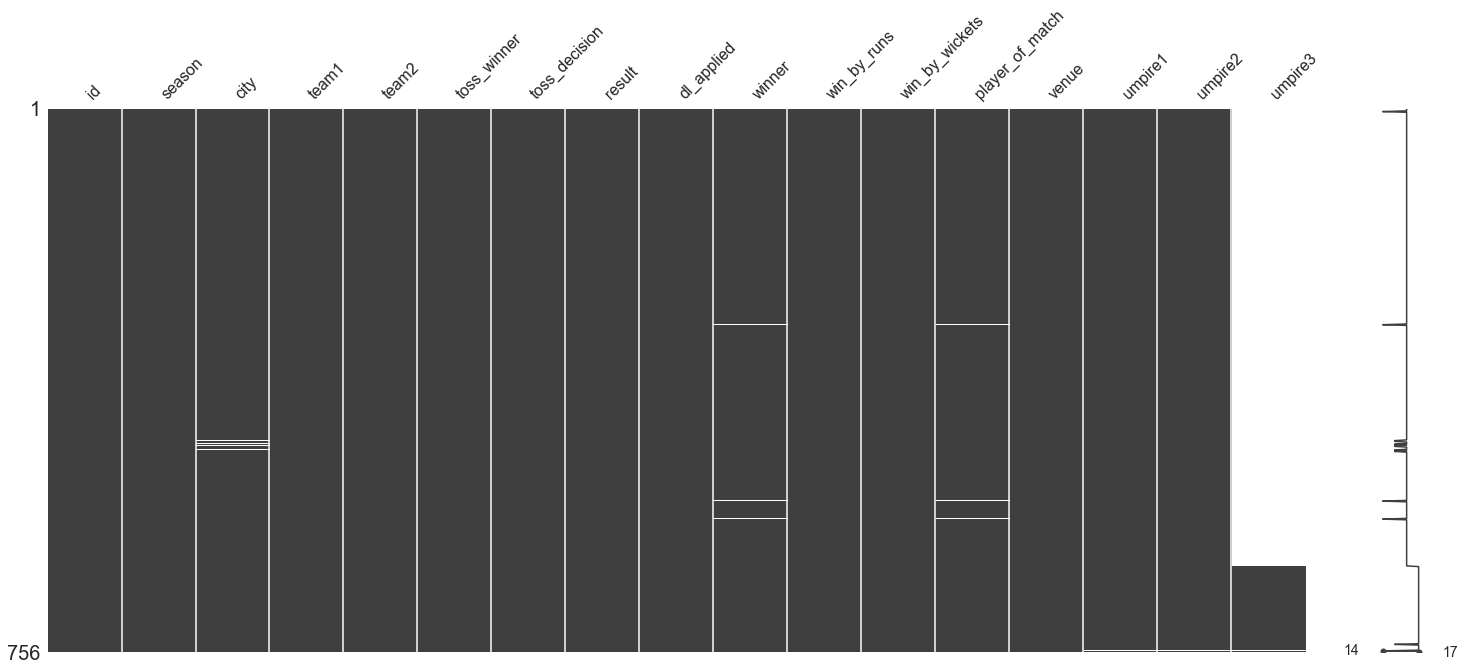

In [4]:
msno.matrix(df)
plt.show()

#### Since "umpire3" contains all NaN values, we can drop it

In [5]:
df=df.drop(columns=['umpire3', 'id'])

In [6]:
df=df.fillna(method='ffill')  # filling other values

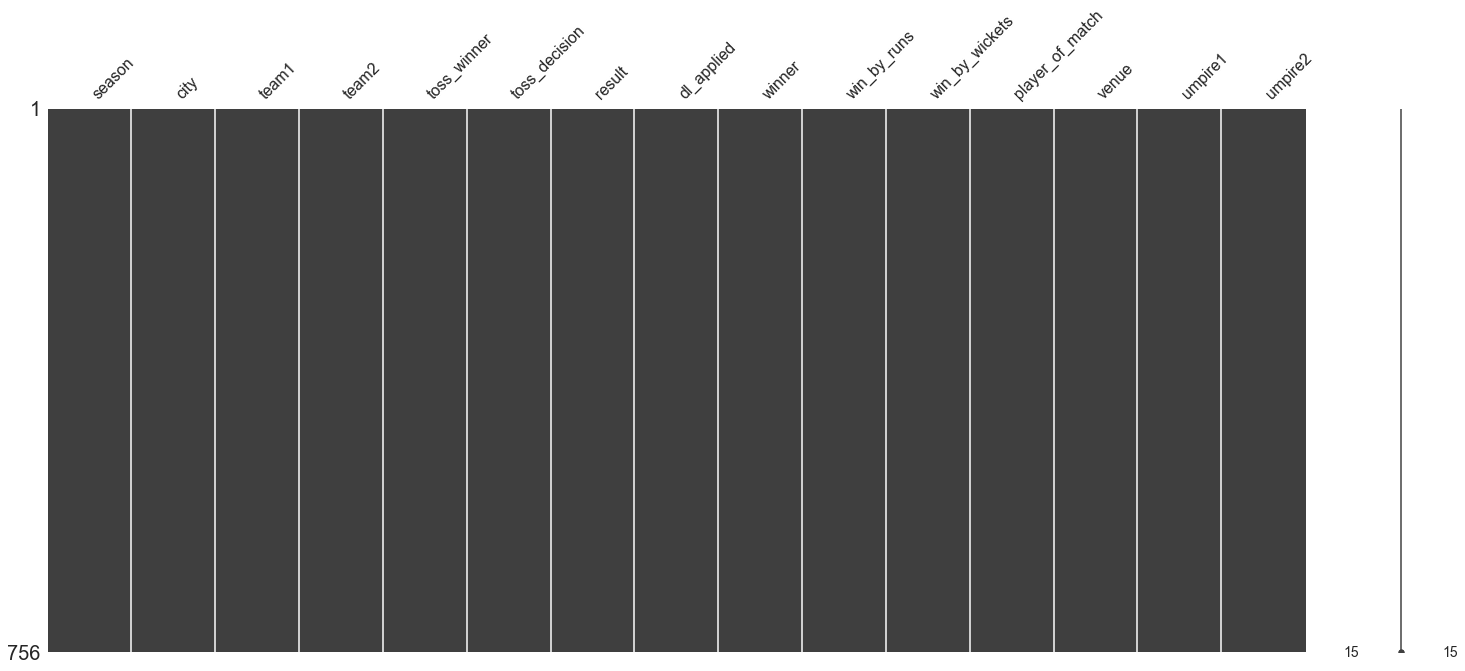

In [7]:
msno.matrix(df)
plt.show()

## 1.2) Checking and Fixing Errors

### 1.2.1) Teams columns

In [8]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [9]:
df['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

#### There were 2 entries for the same team as 'Rising Pune Supergiants' and 'Rising Pune Supergiant'

In [10]:
df.loc[df['team1'] ==  'Rising Pune Supergiants', 'team1'] = 'Rising Pune Supergiant'
df.loc[df['team2'] ==  'Rising Pune Supergiants','team2'] = 'Rising Pune Supergiant'

## 1.2.2) City column

In [11]:
df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Mohali', 'Bengaluru'], dtype=object)

#### There were two entries for the same city as 'Bangalore' and 'Bengaluru'

In [12]:
df.loc[df['city']=='Bengaluru', 'city']='Bangalore'

## Everything is fine in all the other columns and our data is clean.

# 2. Exploratory Data Analysis

### 2.1) Matches in every season

In [13]:
df['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

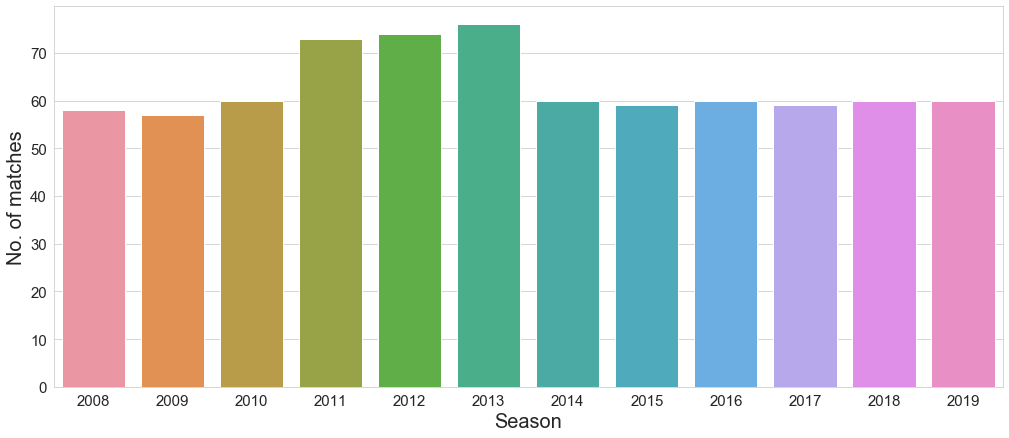

In [14]:
plt.figure(figsize=(17,7))
sns.countplot(x=df['season'])
plt.xlabel('Season', fontsize=20)
plt.ylabel('No. of matches', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 2.2) Total No. of wins by each team

In [15]:
wins = pd.DataFrame(df['winner'].value_counts())
wins['name']=wins.index

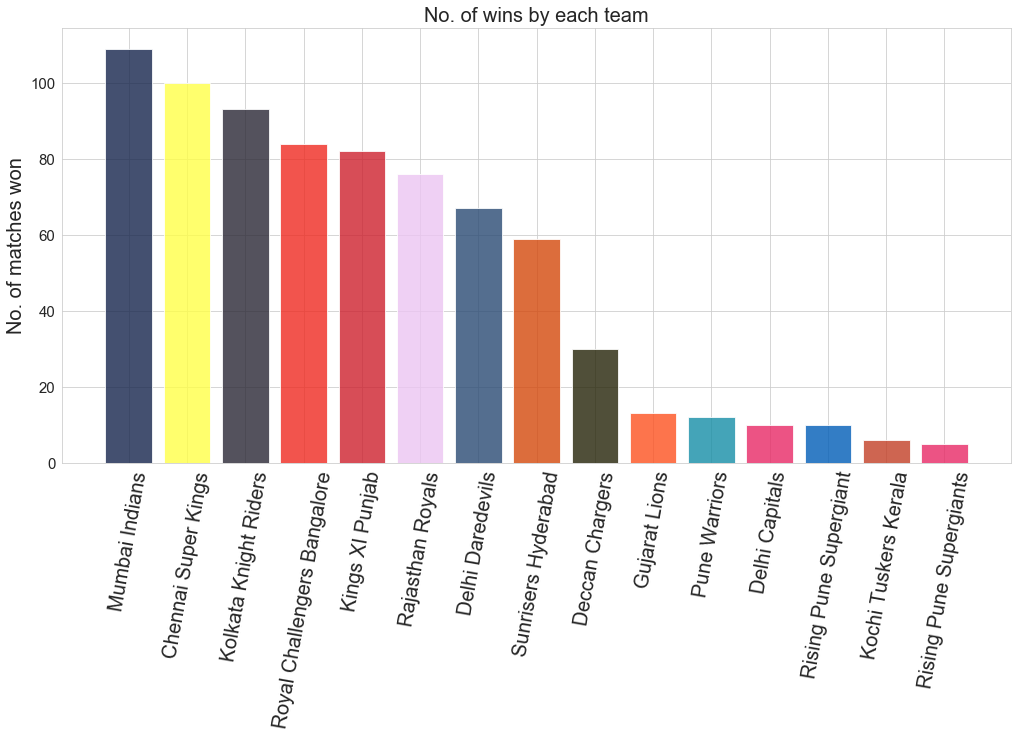

In [16]:
plt.figure(figsize=(17,8))
plt.bar(wins['name'], wins['winner'], color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']  ,alpha=0.8)
plt.xticks(rotation=80,  fontsize=20)
plt.title('No. of wins by each team', fontsize=20)
plt.ylabel('No. of matches won', fontsize=20)
plt.xlabel('')
plt.yticks(fontsize=15)
plt.show()

## 2.3) Favorite Umpire1

In [17]:
ump = pd.DataFrame(df['umpire1'].value_counts())
ump['name']=ump.index

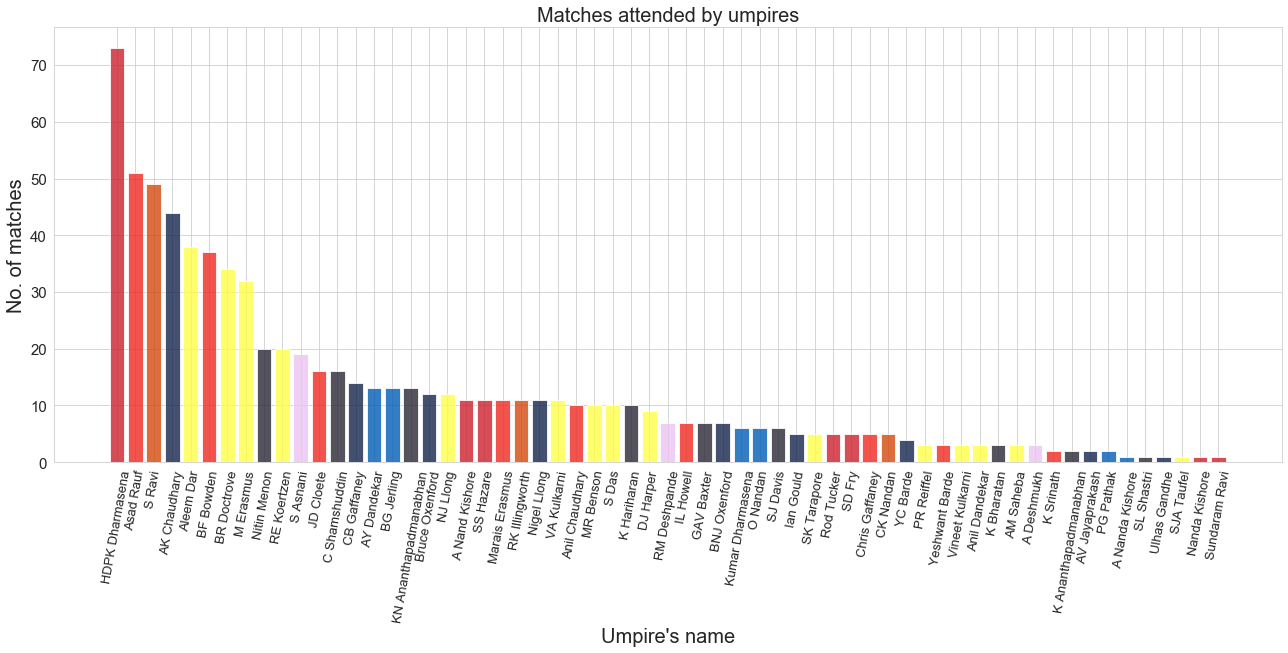

In [18]:
plt.figure(figsize=(22,8))
plt.bar(ump['name'], ump['umpire1'],color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'], alpha=0.8)
plt.xticks(rotation=80, fontsize=13)
plt.title('Matches attended by umpires', fontsize=20)
plt.ylabel('No. of matches', fontsize=20)
plt.xlabel("Umpire's name", fontsize=20)
plt.yticks(fontsize=15)
plt.show()

## 2.4) Favorite Umpire2

In [19]:
ump2 = pd.DataFrame(df['umpire2'].value_counts())
ump2['name']=ump2.index

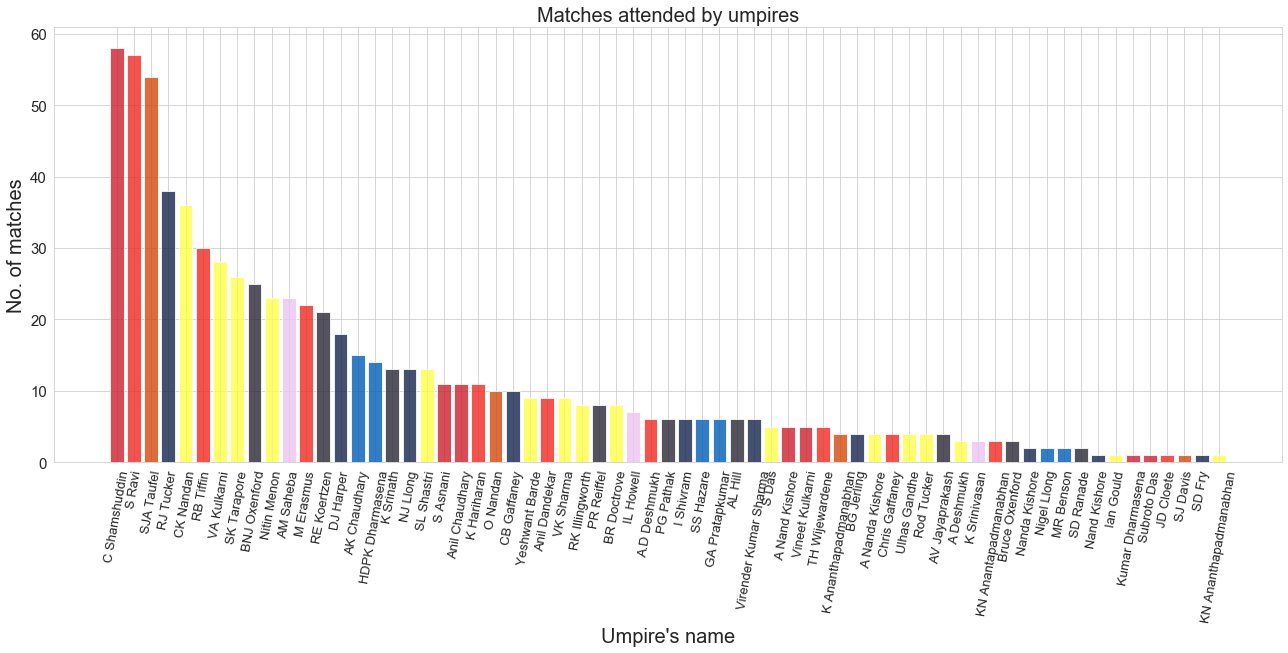

In [20]:
plt.figure(figsize=(22,8))
plt.bar(ump2['name'], ump2['umpire2'],color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'], alpha=0.8)
plt.xticks(rotation=80, fontsize=13)
plt.title('Matches attended by umpires', fontsize=20)
plt.ylabel('No. of matches', fontsize=20)
plt.xlabel("Umpire's name", fontsize=20)
plt.yticks(fontsize=15)
plt.show()

## 2.5) Venue for Matches 

In [21]:
cities = pd.DataFrame(df['city'].value_counts())
cities['name'] = cities.index

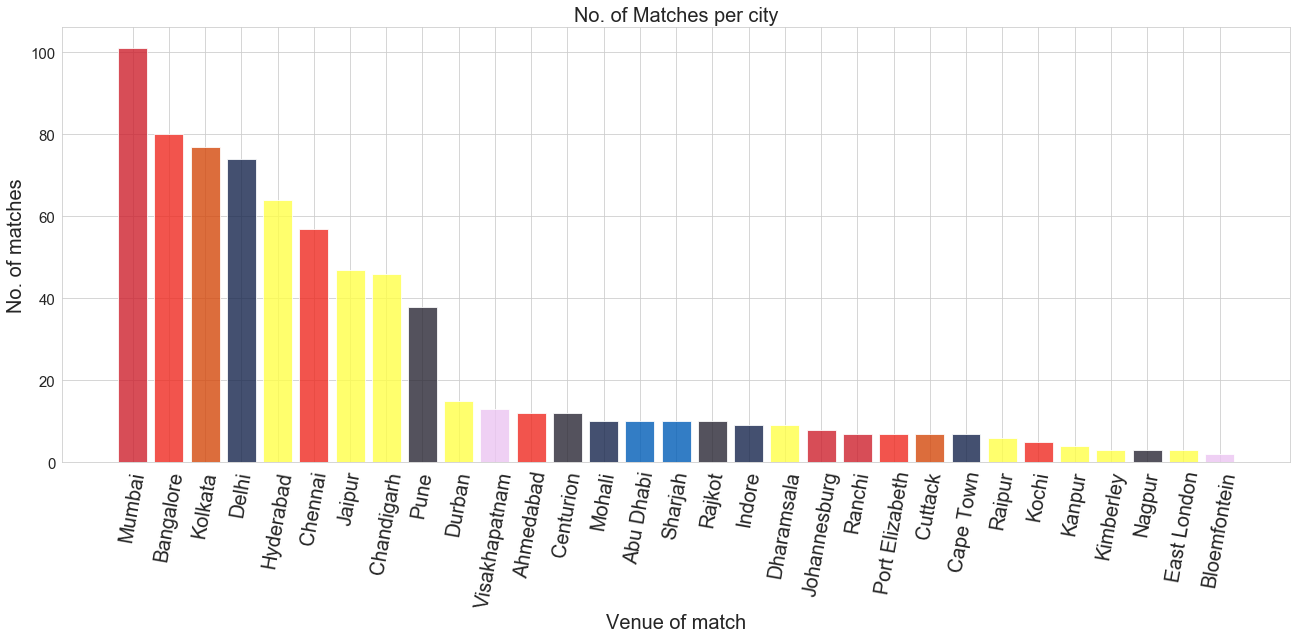

In [22]:
plt.figure(figsize=(22,8))
plt.bar(cities['name'], cities['city'],color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'], alpha=0.8)
plt.xticks(rotation=80, fontsize=20)
plt.title('No. of Matches per city', fontsize=20)
plt.ylabel('No. of matches', fontsize=20)
plt.xlabel("Venue of match", fontsize=20)
plt.yticks(fontsize=15)
plt.show()

## 2.6) Man of the Match

In [23]:
motm = pd.DataFrame(df['player_of_match'].value_counts())
motm['name'] = motm.index
motm= motm.head(20)

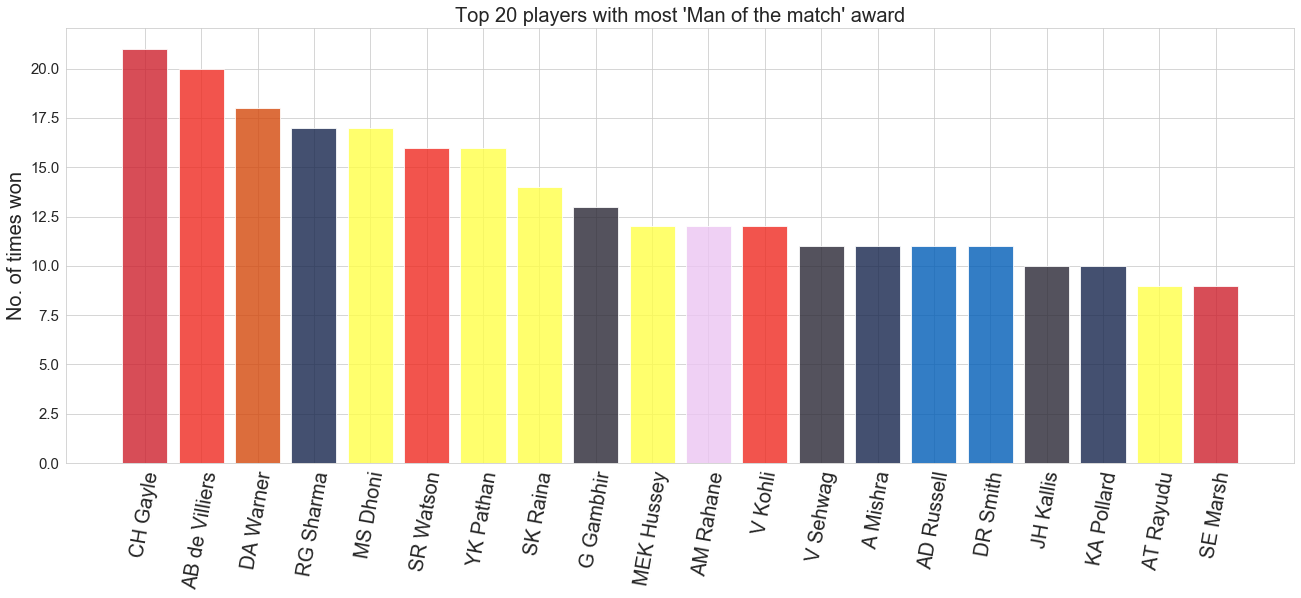

In [24]:
plt.figure(figsize=(22,8))
plt.bar(motm['name'], motm['player_of_match'],color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'], alpha=0.8)
plt.xticks(rotation=80, fontsize=20)
plt.title("Top 20 players with most 'Man of the match' award", fontsize=20)
plt.ylabel('No. of times won', fontsize=20)
plt.yticks(fontsize=15)
plt.show()